# **Pipeline Linear Regression**

**Import Libraries**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

**Check out the Data**

In [2]:
EmployeeCompensation = pd.read_csv(r"C:\Users\Razan\AppData\Local\Programs\Python\Python310\Scripts\MyWork/Employee_Compensation_SF.csv")

In [3]:
EmployeeCompensation.head(10)

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,Fiscal,2013,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,261.0,"Laborers, Local 261",7500,Semi-Skilled & General Labor,...,20210,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,Calendar,2015,1,Public Protection,ECD,Department of Emergency Management,351.0,Municipal Executive Association - Miscellaneous,900,Management,...,30950,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,Fiscal,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",1600,"Payroll, Billing & Accounting",...,49258,0.00,0.0,0.0,0.00,0.01,0.00,0.03,0.04,0.04
3,Calendar,2013,2,"Public Works, Transportation & Commerce",CWP,PUC Wastewater Enterprise,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",...,1554,0.00,0.0,0.0,0.00,0.00,0.00,0.29,0.29,0.29
4,Calendar,2013,1,Public Protection,POL,Police,911.0,Police Officers' Association,Q000,Police Services,...,43839,0.00,0.0,0.0,0.00,-2.73,3.04,0.00,0.31,0.31
5,Calendar,2014,6,General Administration & Finance,ADM,General Services Agency - City Admin,790.0,"SEIU - Miscellaneous, Local 1021",1800,"Budget, Admn & Stats Analysis",...,3095,0.57,0.0,0.0,0.57,0.13,0.12,0.05,0.30,0.87
6,Fiscal,2014,6,General Administration & Finance,ADM,General Services Agency - City Admin,790.0,"SEIU - Miscellaneous, Local 1021",1800,"Budget, Admn & Stats Analysis",...,3095,0.57,0.0,0.0,0.57,0.13,0.12,0.05,0.30,0.87
7,Calendar,2015,7,General City Responsibilities,UNA,General Fund Unallocated,790.0,"SEIU - Miscellaneous, Local 1021",3200,Recreation,...,14480,0.00,0.0,0.0,0.00,0.00,0.00,1.27,1.27,1.27
8,Fiscal,2014,2,"Public Works, Transportation & Commerce",CWP,PUC Wastewater Enterprise,38.0,"Plumbers and Pipefitters, Local 38",7200,Supervisory-Labor & Trade,...,4462,0.00,0.0,0.0,0.00,0.00,0.00,1.53,1.53,1.53
9,Calendar,2014,2,"Public Works, Transportation & Commerce",CWP,PUC Wastewater Enterprise,38.0,"Plumbers and Pipefitters, Local 38",7200,Supervisory-Labor & Trade,...,4462,0.00,0.0,0.0,0.00,0.00,0.00,1.53,1.53,1.53


In [477]:
EmployeeCompensation.shape

(291579, 22)

In [478]:
EmployeeCompensation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291579 entries, 0 to 291578
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Year Type                291579 non-null  object 
 1   Year                     291579 non-null  int64  
 2   Organization Group Code  291579 non-null  int64  
 3   Organization Group       291579 non-null  object 
 4   Department Code          291579 non-null  object 
 5   Department               291579 non-null  object 
 6   Union Code               291536 non-null  float64
 7   Union                    291536 non-null  object 
 8   Job Family Code          291534 non-null  object 
 9   Job Family               291534 non-null  object 
 10  Job Code                 291579 non-null  object 
 11  Job                      291579 non-null  object 
 12  Employee Identifier      291579 non-null  int64  
 13  Salaries                 291579 non-null  float64
 14  Over

In [479]:
EmployeeCompensation.dtypes

Year Type                   object
Year                         int64
Organization Group Code      int64
Organization Group          object
Department Code             object
Department                  object
Union Code                 float64
Union                       object
Job Family Code             object
Job Family                  object
Job Code                    object
Job                         object
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health/Dental              float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

In [480]:
# Number of Unique values in each columns.
EmployeeCompensation.nunique()

Year Type                       2
Year                            4
Organization Group Code         7
Organization Group              7
Department Code                54
Department                     54
Union Code                     69
Union                          73
Job Family Code                56
Job Family                     55
Job Code                     1132
Job                          1138
Employee Identifier         52051
Salaries                   214467
Overtime                   108176
Other Salaries             147450
Total Salary               265908
Retirement                 200885
Health/Dental               92735
Other Benefits             243666
Total Benefits             275465
Total Compensation         284224
dtype: int64

In [481]:
EmployeeCompensation.describe()

,Year,Organization Group Code,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
count,291579.000000,291579.000000,291536.00000,291579.000000,291579.000000,291579.000000,291579.000000,291579.000000,291579.000000,291579.000000,291579.000000,291579.000000,291579.000000
mean,2014.325023,2.977149,489.45450,26917.030712,63263.832943,4410.593941,3784.229261,71458.656145,12949.129125,8929.464346,4648.165267,26526.758737,97985.414882
std,1.032372,1.577651,333.73367,15548.539406,44640.825278,11083.339511,7700.118408,52204.372564,9780.821265,4895.439319,3786.990125,16788.625247,67745.053350
min,2013.000000,1.000000,1.00000,1.000000,-18437.730000,-12308.660000,-19131.100000,-590.450000,-29629.210000,-383.520000,-10636.500000,-19411.610000,0.000000
25%,2013.000000,2.000000,216.00000,13443.000000,23397.590000,0.000000,0.000000,25386.900000,3586.410000,4352.745000,1593.070000,9654.775000,35993.330000
50%,2014.000000,2.000000,535.00000,27001.000000,62570.900000,0.000000,700.000000,67885.110000,13174.780000,11973.710000,4353.440000,30329.090000,98098.380000
75%,2015.000000,4.000000,790.00000,40401.000000,92935.565000,2773.590000,4627.175000,103180.020000,19577.360000,12801.790000,6831.500000,38727.230000,142103.900000
max,2016.000000,7.000000,990.00000,53794.000000,515101.800000,227313.620000,342802.630000,515101.800000,105052.980000,21872.800000,35157.630000,141043.640000,653498.150000


In [482]:
EmployeeCompensation.columns

Index(['Year Type', 'Year', 'Organization Group Code', 'Organization Group',
       'Department Code', 'Department', 'Union Code', 'Union',
       'Job Family Code', 'Job Family', 'Job Code', 'Job',
       'Employee Identifier', 'Salaries', 'Overtime', 'Other Salaries',
       'Total Salary', 'Retirement', 'Health/Dental', 'Other Benefits',
       'Total Benefits', 'Total Compensation'],
      dtype='object')

# **EDA**
# **Exploratory Data Analysis**

**We want create some simple plots to check out the data!**

create a simple heatmap to see where we are missing data!

C:\Users\Razan\AppData\Local\Temp\ipykernel_19524\3396493310.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(EmployeeCompensation.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


<AxesSubplot: >

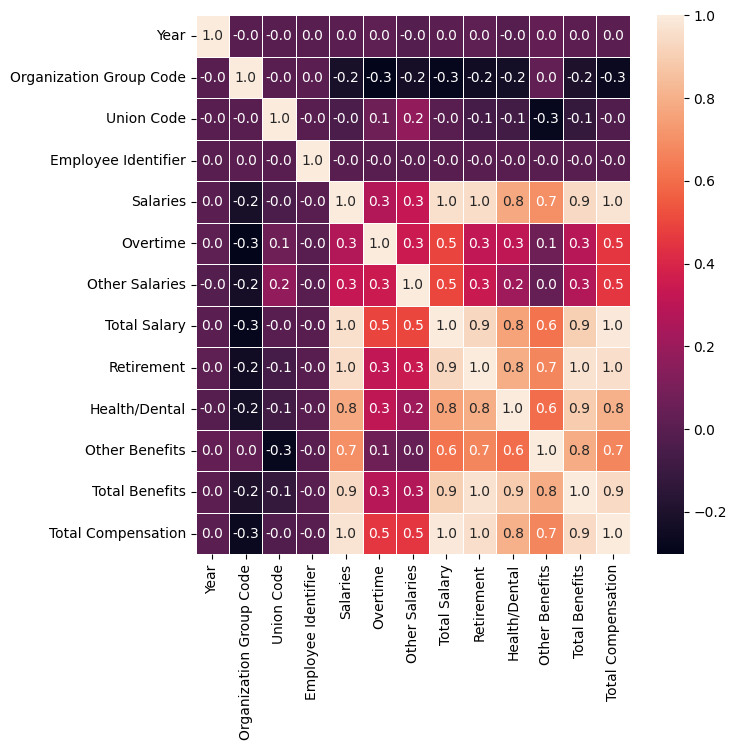

In [484]:
#heatmap for dataset
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(EmployeeCompensation.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [485]:
corr = EmployeeCompensation.corr()
corr.style.background_gradient(cmap='Blues')

C:\Users\Razan\AppData\Local\Temp\ipykernel_19524\1505532319.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = EmployeeCompensation.corr()


,Year,Organization Group Code,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Year,1.000000,-0.005429,-0.003761,0.000880,0.005384,0.016182,-0.016879,0.005550,0.015384,-0.012066,0.031013,0.012439,0.007360
Organization Group Code,-0.005429,1.000000,-0.006772,0.003347,-0.217095,-0.302966,-0.228335,-0.283642,-0.246563,-0.233034,0.024984,-0.205959,-0.269616
Union Code,-0.003761,-0.006772,1.000000,-0.002657,-0.048265,0.060625,0.171829,-0.003053,-0.066829,-0.073233,-0.282116,-0.123928,-0.033064
Employee Identifier,0.000880,0.003347,-0.002657,1.000000,-0.002956,-0.001169,-0.002242,-0.003107,-0.001775,-0.001826,-0.000027,-0.001573,-0.002784
Salaries,0.005384,-0.217095,-0.048265,-0.002956,1.000000,0.271006,0.324043,0.960449,0.952709,0.774310,0.696455,0.937917,0.972558
Overtime,0.016182,-0.302966,0.060625,-0.001169,0.271006,1.000000,0.348108,0.495394,0.313193,0.312113,0.061638,0.287375,0.452968
Other Salaries,-0.016879,-0.228335,0.171829,-0.002242,0.324043,0.348108,1.000000,0.498500,0.340504,0.210310,0.039236,0.268548,0.450696
Total Salary,0.005550,-0.283642,-0.003053,-0.003107,0.960449,0.495394,0.498500,1.000000,0.931395,0.759409,0.614424,0.902651,0.994296
Retirement,0.015384,-0.246563,-0.066829,-0.001775,0.952709,0.313193,0.340504,0.931395,1.000000,0.794249,0.669843,0.965279,0.956949
Health/Dental,-0.012066,-0.233034,-0.073233,-0.001826,0.774310,0.312113,0.210310,0.759409,0.794249,1.000000,0.598886,0.889401,0.805613


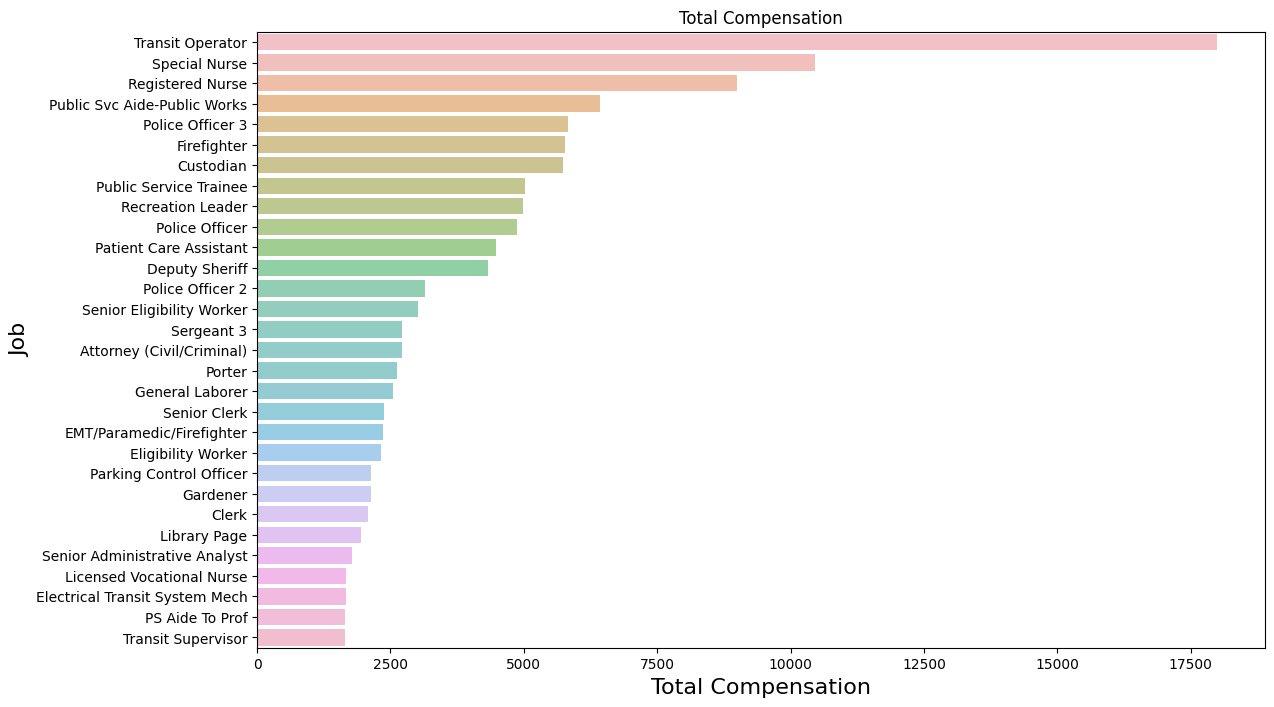

In [486]:
#Top 30 sectors for SF salary analysis
plt.figure(figsize=(13,8))
sectors = EmployeeCompensation['Job'].value_counts()[0:30]
sns.barplot(y=sectors.index, x=sectors.values, alpha=0.6)
plt.xlabel('Total Compensation', fontsize=16)
plt.ylabel("Job", fontsize=16)
plt.title("Total Compensation")
plt.show();

In [487]:
#calculating the mean Total Benefits for each of the job. Print the top-10 earning job.
#making job lowercase
EmployeeCompensation.Job = EmployeeCompensation.Job.str.lower()
#if job has more than 500 data points as True False
criteria = EmployeeCompensation.Job.value_counts()>500
#take job more than 500 data points
joblist = EmployeeCompensation.Job.value_counts()[criteria].reset_index()
#
df = EmployeeCompensation[['Job', 'Total Benefits']]
#
df = df[df.Job.isin(joblist['index'])]
#
pivoted_data = df.pivot_table('Total Benefits', index='Job' , aggfunc=np.mean)
#
sorted_EmployeeCompensation = pivoted_data.sort_values(by='Total Benefits', ascending= False)
print(sorted_EmployeeCompensation[:10])

                              Total Benefits
Job                                         
manager vi                      52221.478382
nurse manager                   49127.920047
captain, fire suppression       47788.061166
attorney (civil/criminal)       47650.228254
manager iv                      47557.737040
manager v                       47247.599193
eng/arch/landscape arch sr      46675.209898
senior physician specialist     45403.942356
manager iii                     45253.863111
lieutenant, fire suppression    44049.856120


<AxesSubplot: xlabel='Job'>

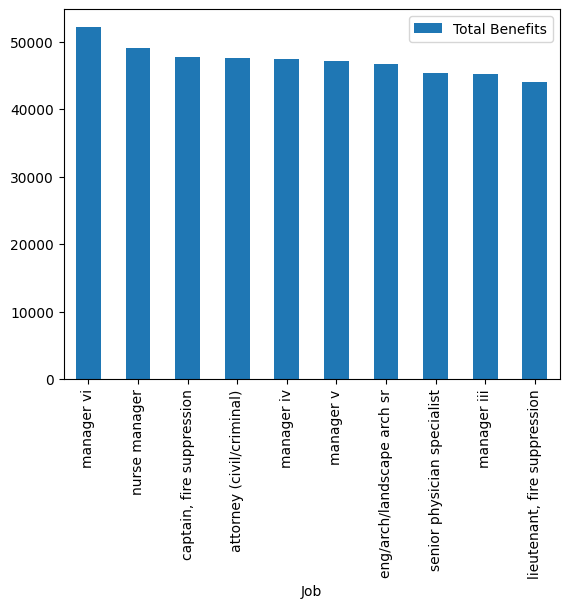

In [488]:
#Visualization above the code
sorted_EmployeeCompensation[0:10].plot.bar()

In [489]:
# Let’s find the employees who earn the highest totalPay amount in each year.
EmployeeCompensation['Job'] = EmployeeCompensation['Job'].str.lower()
years = EmployeeCompensation.Year.unique()
print(years)
for year in years:
    sorteddata = EmployeeCompensation[EmployeeCompensation.Year==year].sort_values(by='Total Salary',ascending=False)
    person = sorteddata['Employee Identifier'].iloc[0]
    salary = sorteddata['Total Salary'].iloc[0]
    print("In the year %d %s earned the highest salary which is %8.1f"%(year,person,salary))

[2013 2015 2014 2016]
In the year 2013 6758 earned the highest salary which is 381716.8
In the year 2015 3931 earned the highest salary which is 507831.6
In the year 2014 16517 earned the highest salary which is 471952.6
In the year 2016 3931 earned the highest salary which is 515101.8


In [490]:
#Finding the number of unique job and print 10 most frequent job.
print("The number of unique job is %d"%len(np.unique(EmployeeCompensation['Job'])))
print("Job Frequency in the dataset")
print(EmployeeCompensation['Job'].value_counts()[0:10])

The number of unique job is 1138
Job Frequency in the dataset
transit operator                17985
special nurse                   10465
registered nurse                 8988
public svc aide-public works     6420
police officer 3                 5830
firefighter                      5778
custodian                        5736
public service trainee           5029
recreation leader                4991
police officer                   4868
Name: Job, dtype: int64


<AxesSubplot: >

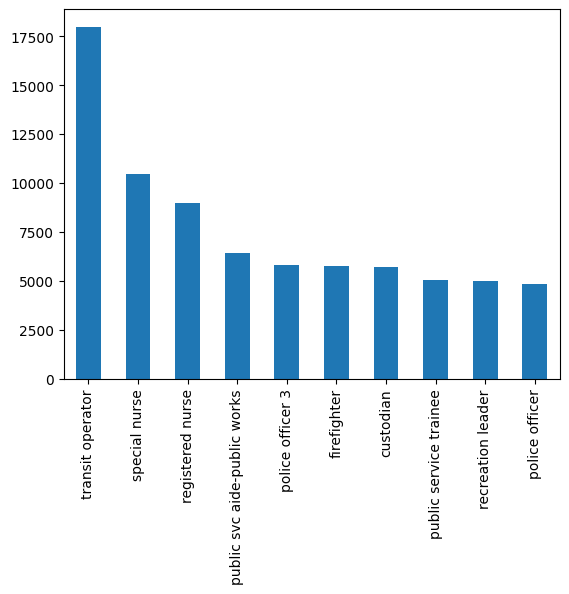

In [491]:
#Visualization above the code
EmployeeCompensation['Job'].value_counts()[0:10].plot.bar()

<AxesSubplot: >

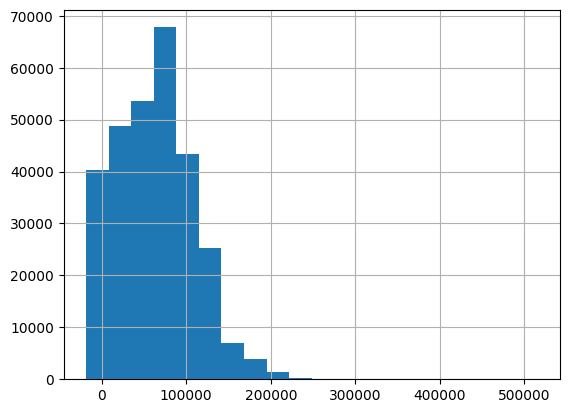

In [492]:
EmployeeCompensation['Salaries'].hist(bins=20)

**Explore top departments by average individual salaries and by department salaries budgets.**

In [493]:
groupped_by_department = EmployeeCompensation.groupby(by='Department')
departments_stats = groupped_by_department['Salaries'].agg(['mean', 'sum', 'count', 'std'])
departments_stats['sum'] = departments_stats['sum'] / 1000000000.0

top_departments_by_department_budget = departments_stats.sort_values(by='sum', ascending=False).iloc[0:10]
top_departments_by_average_salary = departments_stats.sort_values(by='mean', ascending=False).iloc[0:10]

In [494]:
def plot_salaries(entries, title, field_name):

    def calc_95_ci(entry):
        mean = entry['mean']
        z = 1.960
        std = entry['std']
        n = entry['count']
        diff = z*std/np.sqrt(n)
        return (mean - diff, mean + diff, diff)

    cb_dark_blue = (0/255, 107/255, 164/255)
    cb_orange = (255/255, 128/255, 14/255)
    cb_light_gray = (171/255, 171/255, 171/255)

    fig = plt.figure()
    fig.set_size_inches(18, 12)
    ax1 = fig.add_subplot(111)

    ax1.set_title(title)

    plt.sca(ax1)
    x_labels = entries.index
    plt.xticks(range(10), x_labels, rotation=60)

    sums = entries['sum'].values
    bar1 = ax1.bar([x for x in range(0, 10)], sums, width=0.8, color=cb_dark_blue)
    #ax1.set_ylim([0, 4])
    ax1.set_ylabel("Department " + field_name + " budget, billions of USD")

    ax2 = ax1.twinx()
    means = entries['mean'].values
    bar2 = ax2.bar(range(0, 10), means, width=0.3, color=cb_orange)
    #ax2.set_ylim([0, 170000])
    ax2.set_ylabel("Individual " + field_name + ", USD")

    fig.legend([bar1, bar2], ['Department ' + field_name + ' budget', 'Mean individual ' + field_name], loc=(0.55, 0.9), ncol=2)

    confidence_intervals = [calc_95_ci(entries.loc[x_labels[i]]) for i in range(0, len(x_labels))]
    salaries = entries['mean'].to_numpy()
    for i in range(0, len(x_labels)):
        plt.errorbar(i, salaries[i], xerr=0, yerr=confidence_intervals[i][2], capsize=10, color='black')

    plt.show()

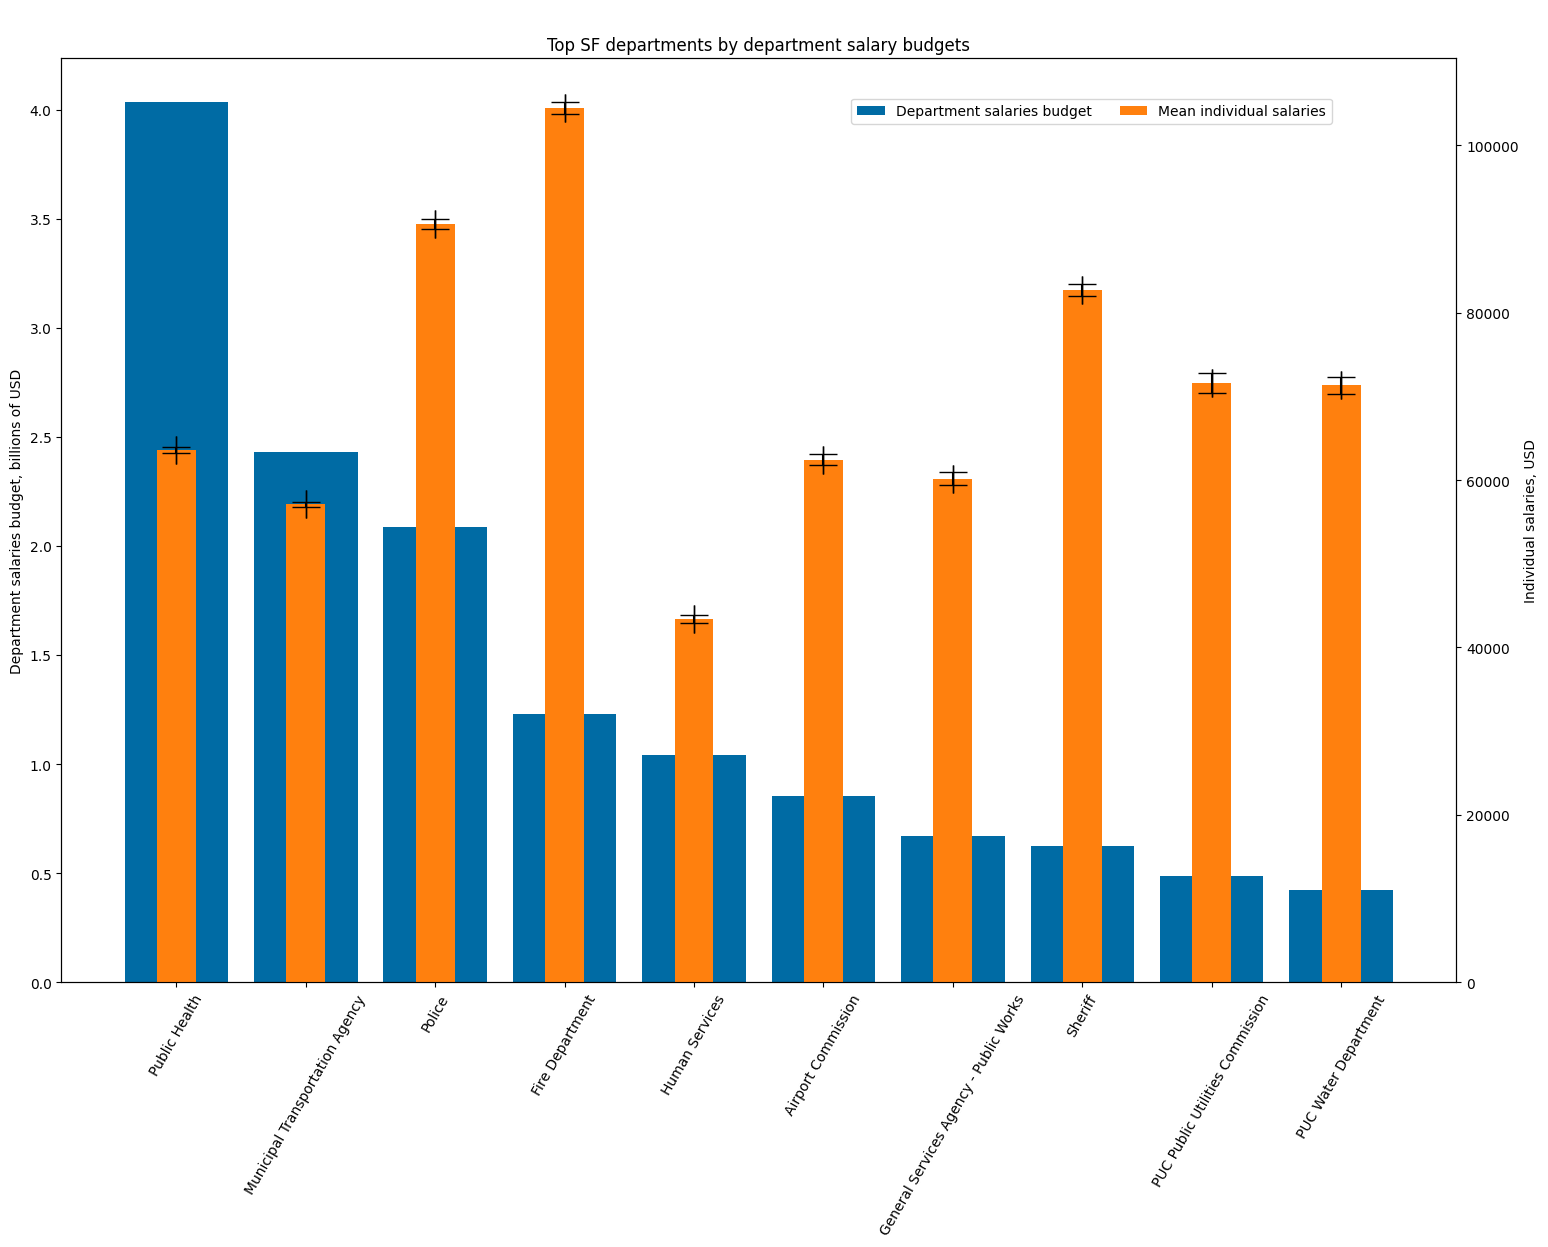

In [495]:
plot_salaries(top_departments_by_department_budget, 'Top SF departments by department salary budgets', 'salaries')

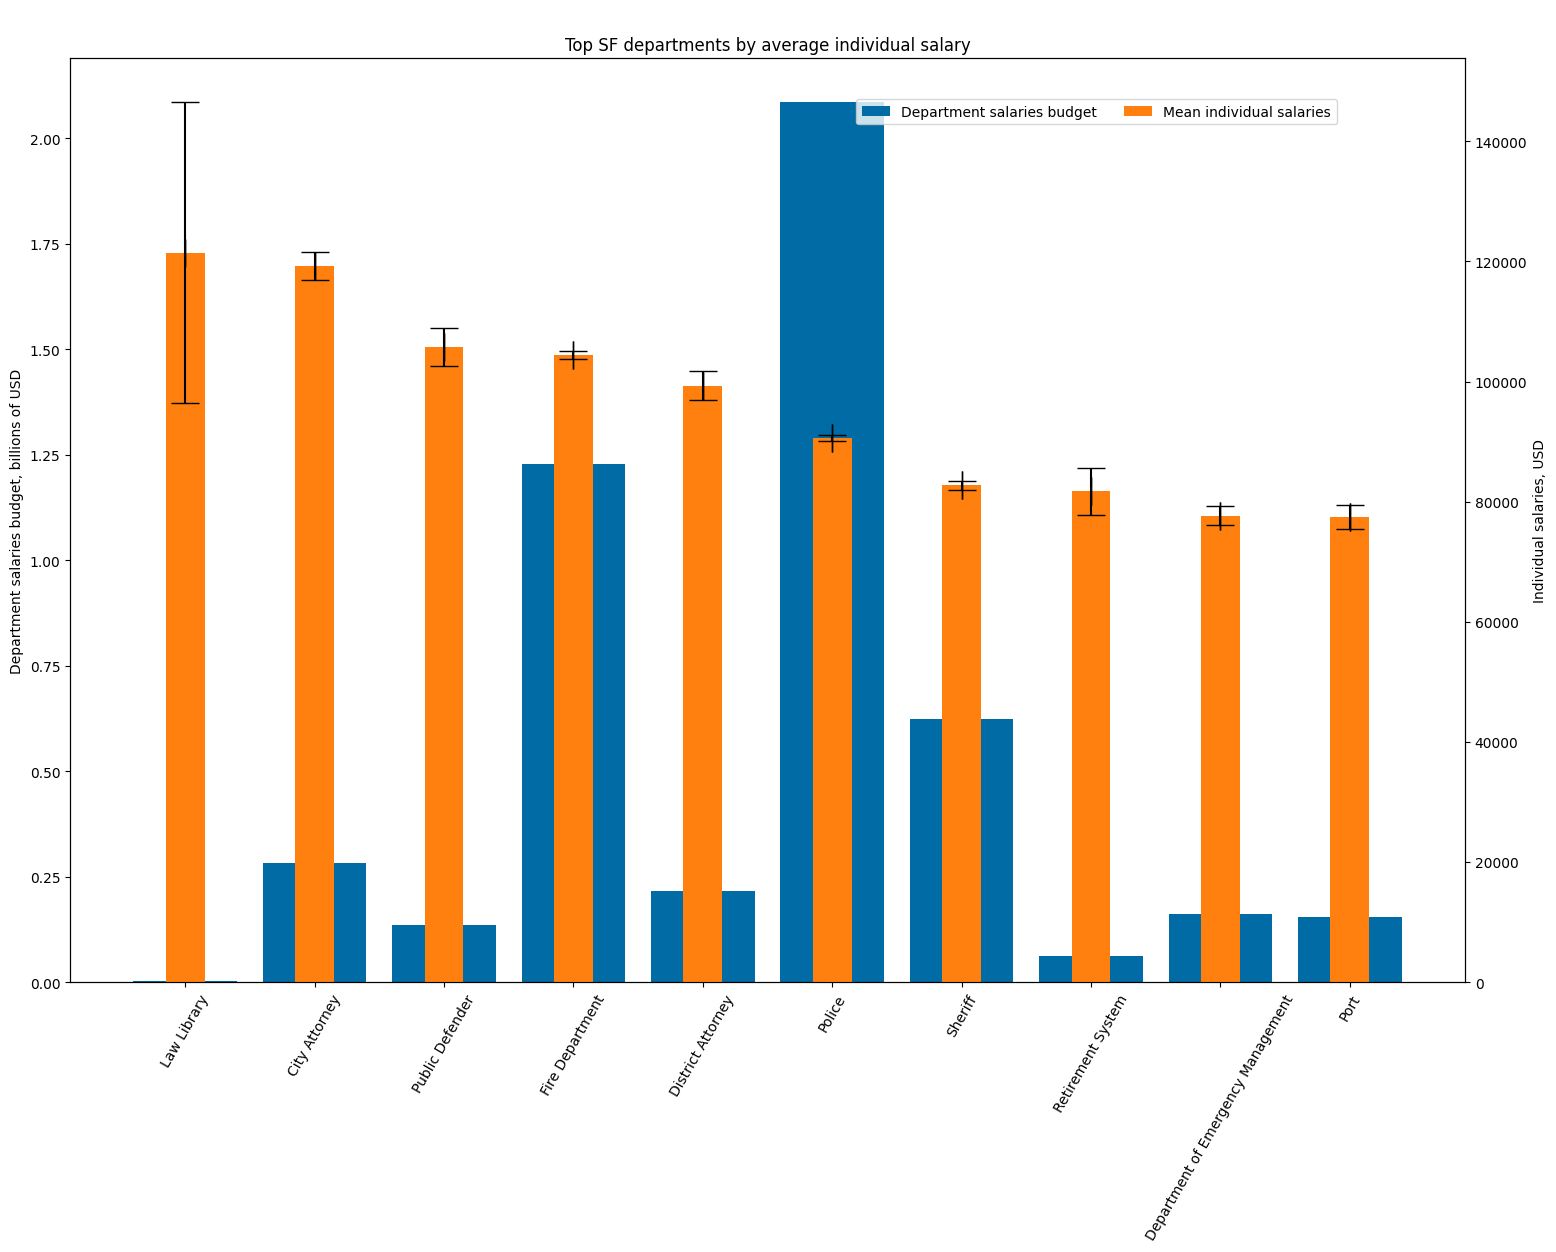

In [496]:
plot_salaries(top_departments_by_average_salary, 'Top SF departments by average individual salary', 'salaries')

In [497]:
EmployeeCompensation['Guaranteed Compensations'] = EmployeeCompensation['Salaries'] + EmployeeCompensation['Total Benefits']

groupped_by_department = EmployeeCompensation.groupby(by='Department')
departments_compensation_stats = groupped_by_department['Guaranteed Compensations'].agg(['mean', 'sum', 'count', 'std'])
departments_compensation_stats['sum'] = departments_compensation_stats['sum'] / 1000000000.0

top_departments_by_compensation_budget = departments_compensation_stats.sort_values(by='sum', ascending=False).iloc[0:10]
top_departments_by_compensation = departments_compensation_stats.sort_values(by='mean', ascending=False).iloc[0:10]

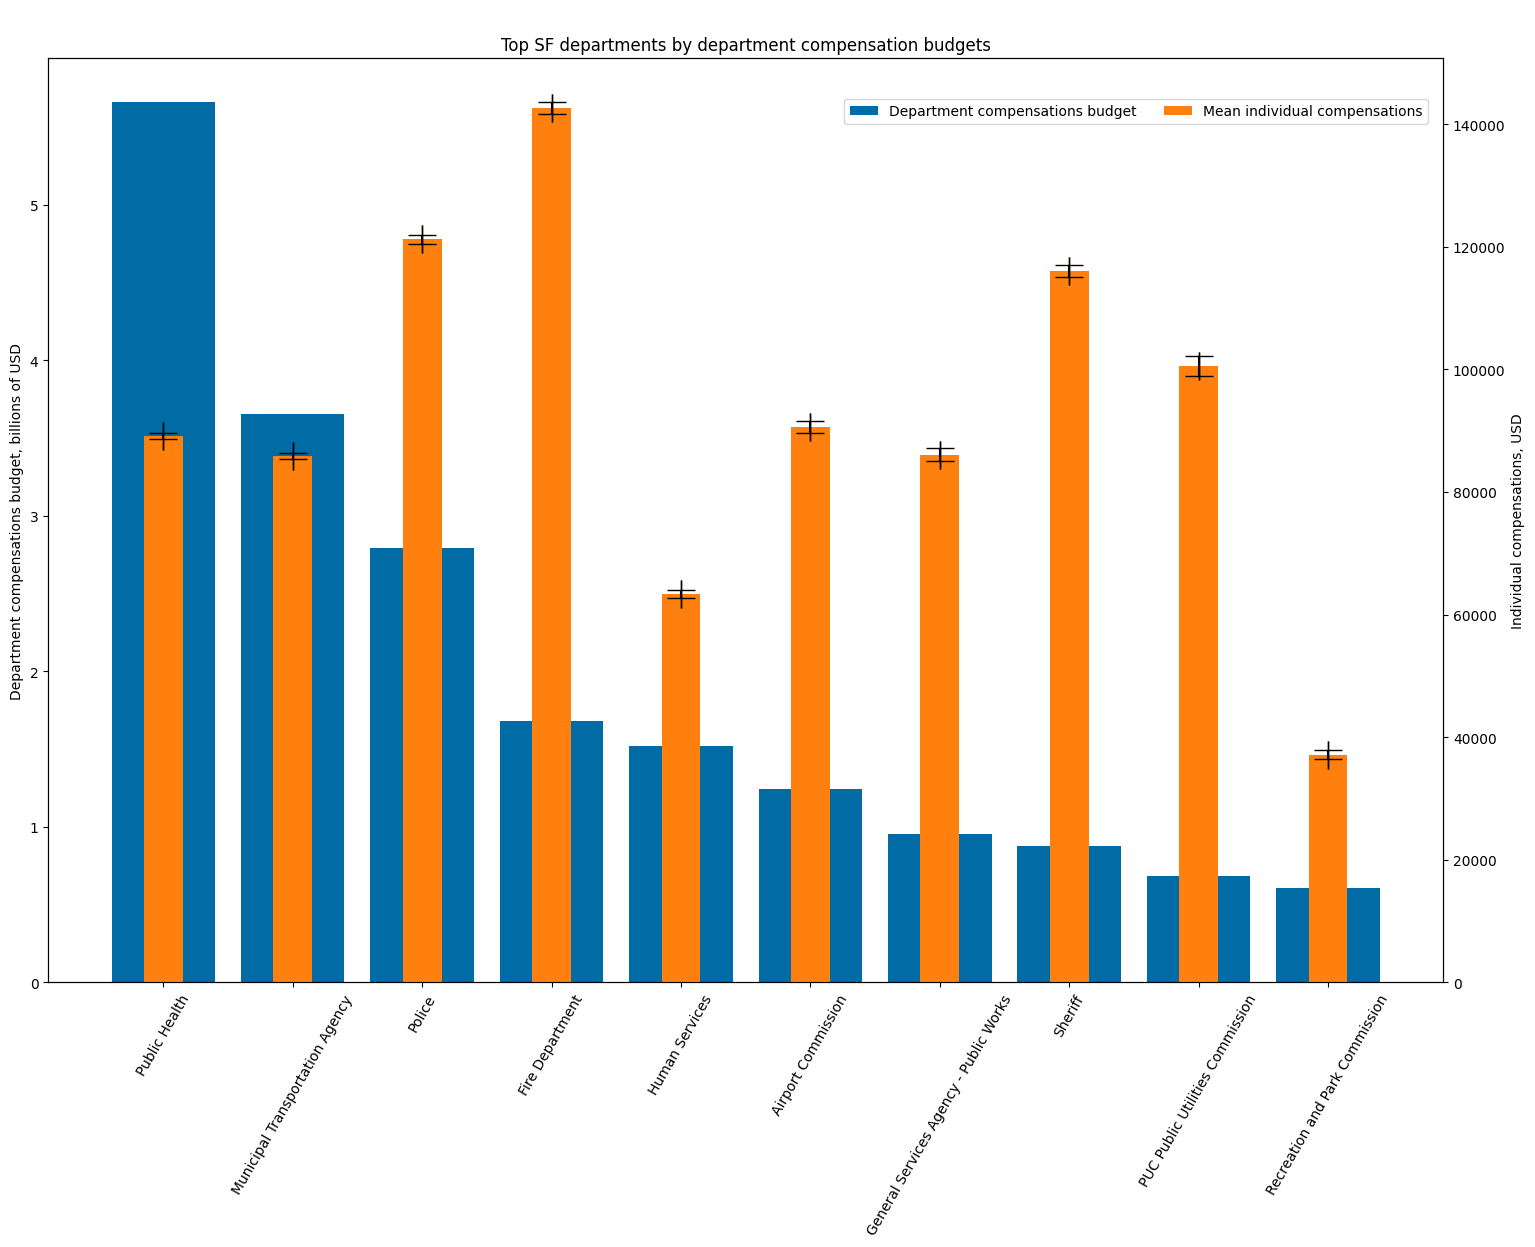

In [498]:
plot_salaries(top_departments_by_compensation_budget, 'Top SF departments by department compensation budgets', 'compensations')

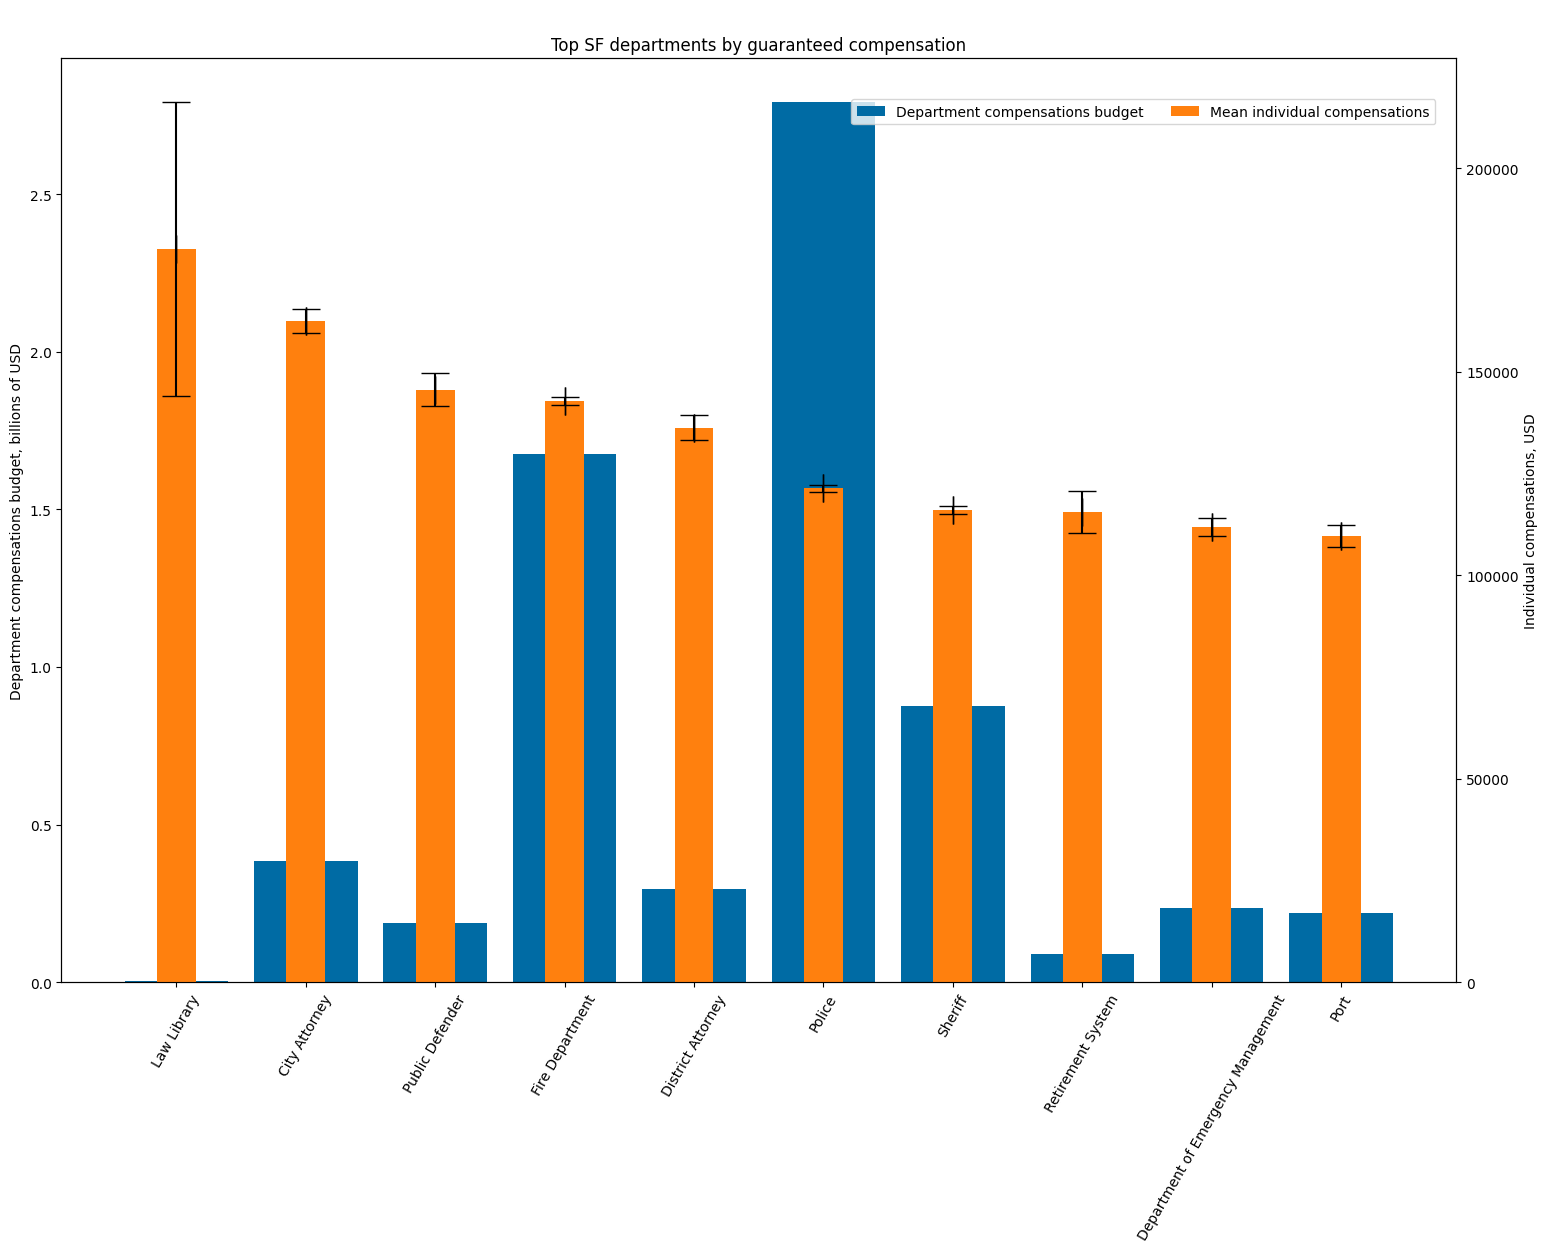

In [499]:
plot_salaries(top_departments_by_compensation, 'Top SF departments by guaranteed compensation', 'compensations')

**Check if top lists for salaries and compensations are identical.**

In [500]:
all(top_departments_by_compensation.index == top_departments_by_average_salary.index)

True

**Top lists for individual salaries and compensations are different.**

In [501]:
df_by_salary = top_departments_by_average_salary.reset_index(drop=False)[['Department', 'mean']]
df_by_salary[['Department by salary', 'Salary']] = df_by_salary[['Department', 'mean']]
df_by_salary = df_by_salary[['Department by salary', 'Salary']]

df_by_compensation = top_departments_by_compensation.reset_index(drop=False)[['Department', 'mean']]
df_by_compensation[['Department by compensation', 'Compensation']] = df_by_compensation[['Department', 'mean']]
df_by_compensation = df_by_compensation[['Department by compensation', 'Compensation']]

compare_df = pd.concat([df_by_salary, df_by_compensation], axis=1)
compare_df.head(10)

,Department by salary,Salary,Department by compensation,Compensation
0,Law Library,121466.712500,Law Library,180070.199375
1,City Attorney,119246.499401,City Attorney,162412.447970
2,Public Defender,105759.548600,Public Defender,145525.179601
3,Fire Department,104449.077706,Fire Department,142693.642771
4,District Attorney,99312.102250,District Attorney,136248.812545
5,Police,90596.280061,Police,121272.381757
6,Sheriff,82690.363675,Sheriff,116053.629918
7,Retirement System,81712.667134,Retirement System,115520.164647
8,Department of Emergency Management,77661.705153,Department of Emergency Management,111806.934995
9,Port,77439.365314,Port,109666.246053


**Explore how big is the part of benefits for each department in comparison with the salary.**

<AxesSubplot: xlabel='Department'>

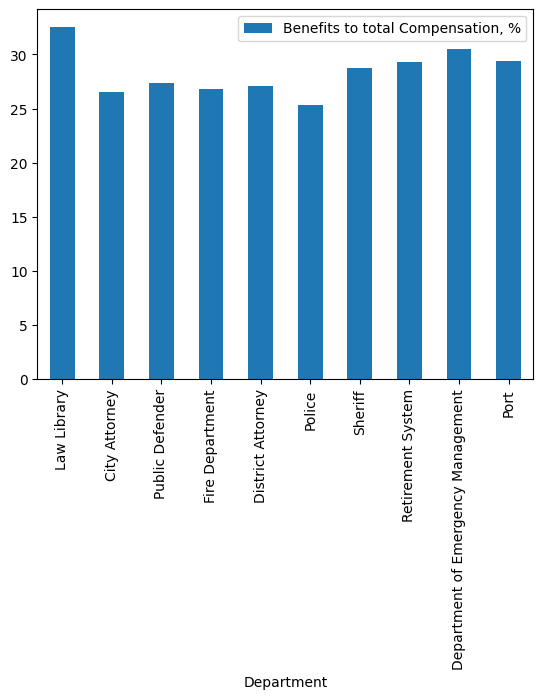

In [502]:
direct_comparison_df = top_departments_by_average_salary[['mean']].join(
    top_departments_by_compensation[['mean']], lsuffix=' salary', rsuffix=' compensation')


direct_comparison_df['Benefits to total Compensation, %'] = (
    (direct_comparison_df['mean compensation'] - direct_comparison_df['mean salary']) / direct_comparison_df['mean compensation']) * 100
direct_comparison_df = direct_comparison_df.reset_index(drop=False)
direct_comparison_df.plot(kind='bar',x='Department',y='Benefits to total Compensation, %')

**We can see from the plot that benefits are from ~25 to ~33% of total compensations for the top 10 departments.**

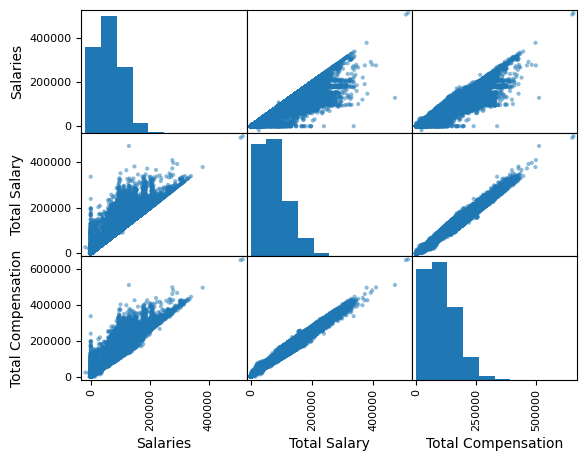

In [503]:
salaries_sm = scatter_matrix(EmployeeCompensation[['Salaries', 'Total Salary', 'Total Compensation']])

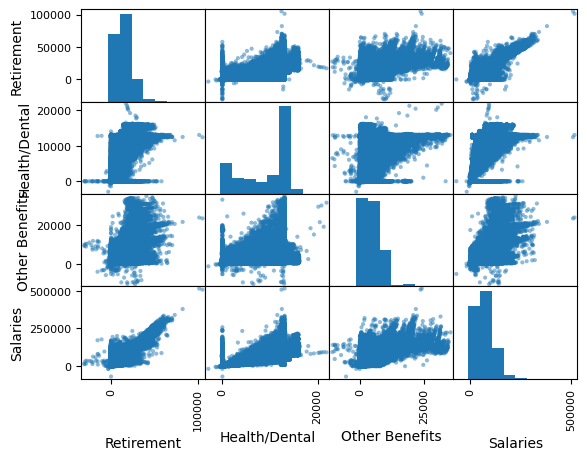

In [120]:
benefits_sm = scatter_matrix(EmployeeCompensation[['Retirement', 'Health/Dental', 'Other Benefits', 'Salaries']])

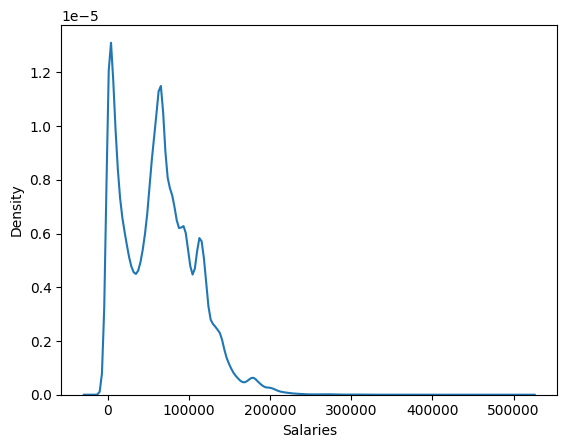

In [504]:
ax = sns.kdeplot(EmployeeCompensation['Salaries'])

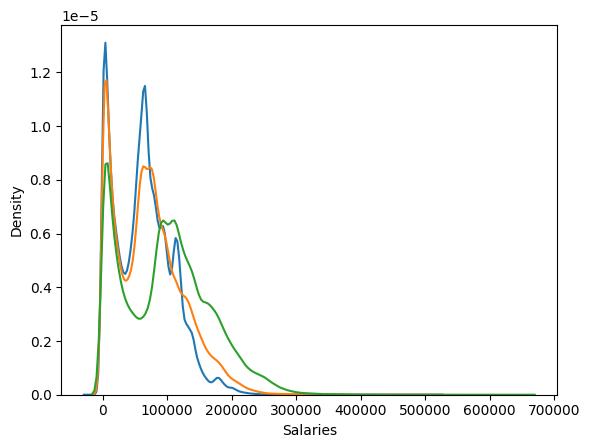

In [505]:
salary = ['Salaries', 'Total Salary', 'Total Compensation']
for col in salary:
    ax_salary = sns.kdeplot(EmployeeCompensation[col])
    ax_salary

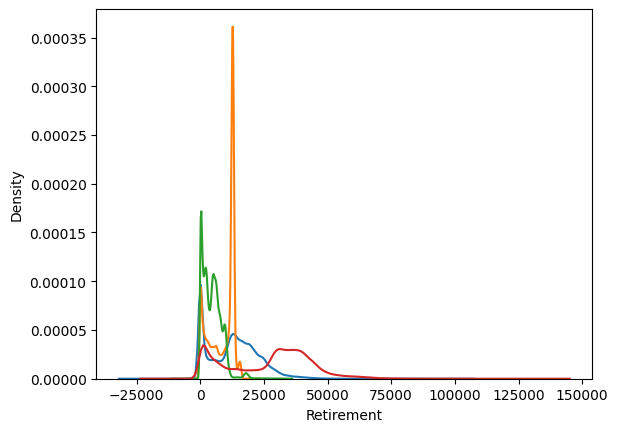

In [506]:
benefits = ['Retirement', 'Health/Dental', 'Other Benefits', 'Total Benefits']
for col in benefits:
   sns.kdeplot(EmployeeCompensation[col])
    

# **Data Cleaning**



## To see how many Missing Values we have.

In [40]:
EmployeeCompensation = pd.read_csv(r"C:\Users\Razan\AppData\Local\Programs\Python\Python310\Scripts\MyWork/Employee_Compensation_SF.csv").drop(["Department Code", "Union Code", "Job Family Code", "Job Code"],axis=1)

In [41]:
EmployeeCompensation.isnull().sum()

Year Type                   0
Year                        0
Organization Group Code     0
Organization Group          0
Department                  0
Union                      43
Job Family                 45
Job                         0
Employee Identifier         0
Salaries                    0
Overtime                    0
Other Salaries              0
Total Salary                0
Retirement                  0
Health/Dental               0
Other Benefits              0
Total Benefits              0
Total Compensation          0
dtype: int64

## Filling the missing values by Intpution approach, using Mean for Numerical values and Mode for the Categorical values 


## This step can be ignored with the pipeline approach but we keep it as a guarantee

In [42]:

EmployeeCompensation['Union']=EmployeeCompensation["Union"].fillna(EmployeeCompensation["Union"].mode()[0])
EmployeeCompensation['Job Family']=EmployeeCompensation['Job Family'].fillna(EmployeeCompensation["Job Family"].mode()[0])
EmployeeCompensation.isnull().sum()

Year Type                  0
Year                       0
Organization Group Code    0
Organization Group         0
Department                 0
Union                      0
Job Family                 0
Job                        0
Employee Identifier        0
Salaries                   0
Overtime                   0
Other Salaries             0
Total Salary               0
Retirement                 0
Health/Dental              0
Other Benefits             0
Total Benefits             0
Total Compensation         0
dtype: int64

## In our Dataset , we want to train the model to see the Total Compensation for the employees using logistic regression and linear regression 

In [43]:
target = "Total Compensation"

X = EmployeeCompensation.drop(target, axis=1)

y = EmployeeCompensation[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=20)

In [44]:
y_train.value_counts(normalize=True)

1230.09      0.000262
2082.71      0.000176
250.00       0.000159
1693.00      0.000146
3295.55      0.000137
               ...   
54648.44     0.000004
127198.45    0.000004
79834.77     0.000004
13901.69     0.000004
11195.40     0.000004
Name: Total Compensation, Length: 228172, dtype: float64

## instead of using the models in a traditional way, using the pipeline approach which aims to less coding and reduces the errors as much as possible by combining some steps in a one step

###  <font color='red'> 1- Linear Regression 

In [45]:
# Only use numerical features

X_train_n = X_train.select_dtypes(exclude=["category", "object"])
X_test_n = X_test.select_dtypes(exclude=["category", "object"])

# Create a Pipeline for our model
pipe = make_pipeline(
    
    SimpleImputer(), 
    StandardScaler(),
    LinearRegression()
)

pipe.fit(X_train_n,y_train)
pipe.score(X_test_n, y_test)

1.0

In [46]:
# return only numeric columns names

numeric_features = X_train.describe().columns 

numeric_features

Index(['Year', 'Organization Group Code', 'Employee Identifier', 'Salaries',
       'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health/Dental', 'Other Benefits', 'Total Benefits'],
      dtype='object')

In [47]:
# Return only categorical names

categorical_features = X_train.describe(exclude="number").columns

categorical_features

Index(['Year Type', 'Organization Group', 'Department', 'Union', 'Job Family',
       'Job'],
      dtype='object')

In [48]:

# Create a transformer for numeric columns

numeric_transformer = Pipeline(
    steps=[
        
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())
    ]
)

# Create Transformer for categorical data

categorical_transformer = Pipeline(
    steps=[
        # most_frequent --> mode
        ('cat_imputer', SimpleImputer(strategy="most_frequent")),
        ('one_hot', OneHotEncoder(handle_unknown='ignore')) ]
)

# Create a preprocessor transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LinearRegression())
    ]
)

clf.fit(X_train, y_train)

print(f"model score: {clf.score(X_test, y_test)}")

model score: 0.9999999999516936


In [49]:
# Calculates the cost functions
def calc_cost(y_true, y_predict):
    
    "Calculate Cost Functions and print output"
    
    result_dict = {}
    
    mse = mean_squared_error(y_true, y_predict)
    mae = mean_absolute_error(y_true, y_predict)
    rmse = mean_squared_error(y_true, y_predict, squared=False)
    
    
    ls = [mse, mae, rmse]
    ls2 = ["MSE", "MAE", "RMSE"]
    
    for x in range(len(ls)):
        print(f"{ls2[x]}: {ls[x]}")
        result_dict[ls2[x]] = ls[x]
    
    return result_dict


print("Linear Regression")



print("\nIn training ")
resTrain = calc_cost(y_train, clf.predict(X_train))

print("\nIn testing")
resVal = calc_cost(y_test, clf.predict(X_test))


Linear Regression

In training 
MSE: 0.21392743107100257
MAE: 0.20974919002966397
RMSE: 0.46252289788831275

In testing
MSE: 0.21970946675567243
MAE: 0.20996784019031603
RMSE: 0.46873176418466933


## <font color='red'> 2- Logistic Regression 

### Because the Total Compensation has a different values, we divide the dataset according to this column into 4 categories

In [33]:
EmployeeCompensation.loc[EmployeeCompensation['Total Compensation'].between(0, 50000), 'Target'] = 'G1'
EmployeeCompensation.loc[EmployeeCompensation['Total Compensation'].between(50000,100000 ), 'Target'] = 'G2'
EmployeeCompensation.loc[EmployeeCompensation['Total Compensation'].between(100001, 250000), 'Target'] = 'G3'
EmployeeCompensation.loc[EmployeeCompensation['Total Compensation'].between(250001, 500000), 'Target'] = 'G4'
EmployeeCompensation.loc[EmployeeCompensation['Total Compensation'].between(500001, 700000), 'Target'] = 'G4'
EmployeeCompensation['Target']=EmployeeCompensation['Target'].fillna(EmployeeCompensation["Target"].mode()[0])

In [34]:

target = "Target"
total="Total Compensation"

#remove the Target and the orignal column of total compenation
X = EmployeeCompensation.drop([target,total], axis=1)

y = EmployeeCompensation[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=20)

In [35]:
y_train.value_counts(normalize=True)

G3    0.470062
G1    0.293454
G2    0.217416
G4    0.019069
Name: Target, dtype: float64

In [36]:
# Only use numerical features

X_train_n = X_train.select_dtypes(exclude=["category", "object"])
X_test_n = X_test.select_dtypes(exclude=["category", "object"])

# Create a Pipeline for our model
pipe = make_pipeline(
    
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression()
)

pipe.fit(X_train_n,y_train)
pipe.score(X_test_n, y_test)

C:\Users\Razan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9987481994649838

In [37]:

# Create a transformer for numeric columns

numeric_transformer = Pipeline(
    steps=[
        # missing values --> by default mean 
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())
    ]
)

# Create Transformer for categorical data

categorical_transformer = Pipeline(
    steps=[
        # most_frequent --> mode
        ('cat_imputer', SimpleImputer(strategy="most_frequent")),
        ('one_hot', OneHotEncoder(handle_unknown='ignore')) # Ignore unseen categorical in transform step not seen in fit_transform
    ]
)

# Create a preprocessor transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ]
)

clf.fit(X_train, y_train)

print(f"model score: {clf.score(X_test, y_test)}")

model score: 0.9963646340626929


C:\Users\Razan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [526]:
preds = clf.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          G1       1.00      1.00      1.00     17282
          G2       0.99      0.99      0.99     12763
          G3       1.00      1.00      1.00     27273
          G4       0.99      0.98      0.98       998

    accuracy                           1.00     58316
   macro avg       0.99      0.99      0.99     58316
weighted avg       1.00      1.00      1.00     58316

